In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Analyse

In [3]:
df = pd.read_csv('Data/diabetes.csv')

In [4]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
plt.style.use('fivethirtyeight')

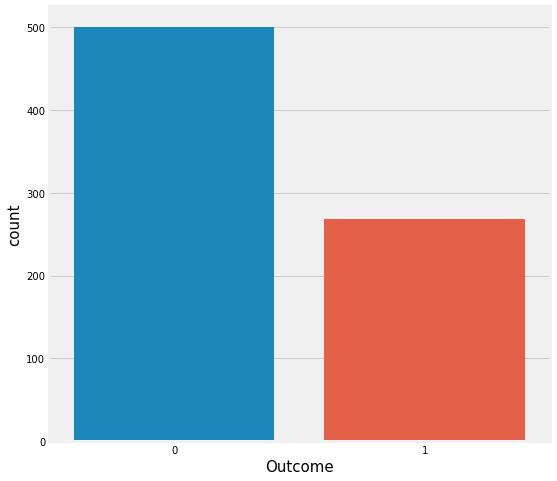

In [9]:
plt.rcParams["axes.labelsize"] = 15

plt.figure(figsize=(8,8))
sns.countplot(data=df,x='Outcome');

In [10]:
percent_0 = df[df['Outcome'] == 0].shape[0] / (df.shape[0]) * 100
percent_1 = df[df['Outcome'] == 1].shape[0] / (df.shape[0]) * 100
print(f'Percent of 0 Outcome at entire Dataset: {percent_0:.3f}%\nPercent of 1 Outcome at entire Dataset: {percent_1:.3f}%')

Percent of 0 Outcome at entire Dataset: 65.104%
Percent of 1 Outcome at entire Dataset: 34.896%


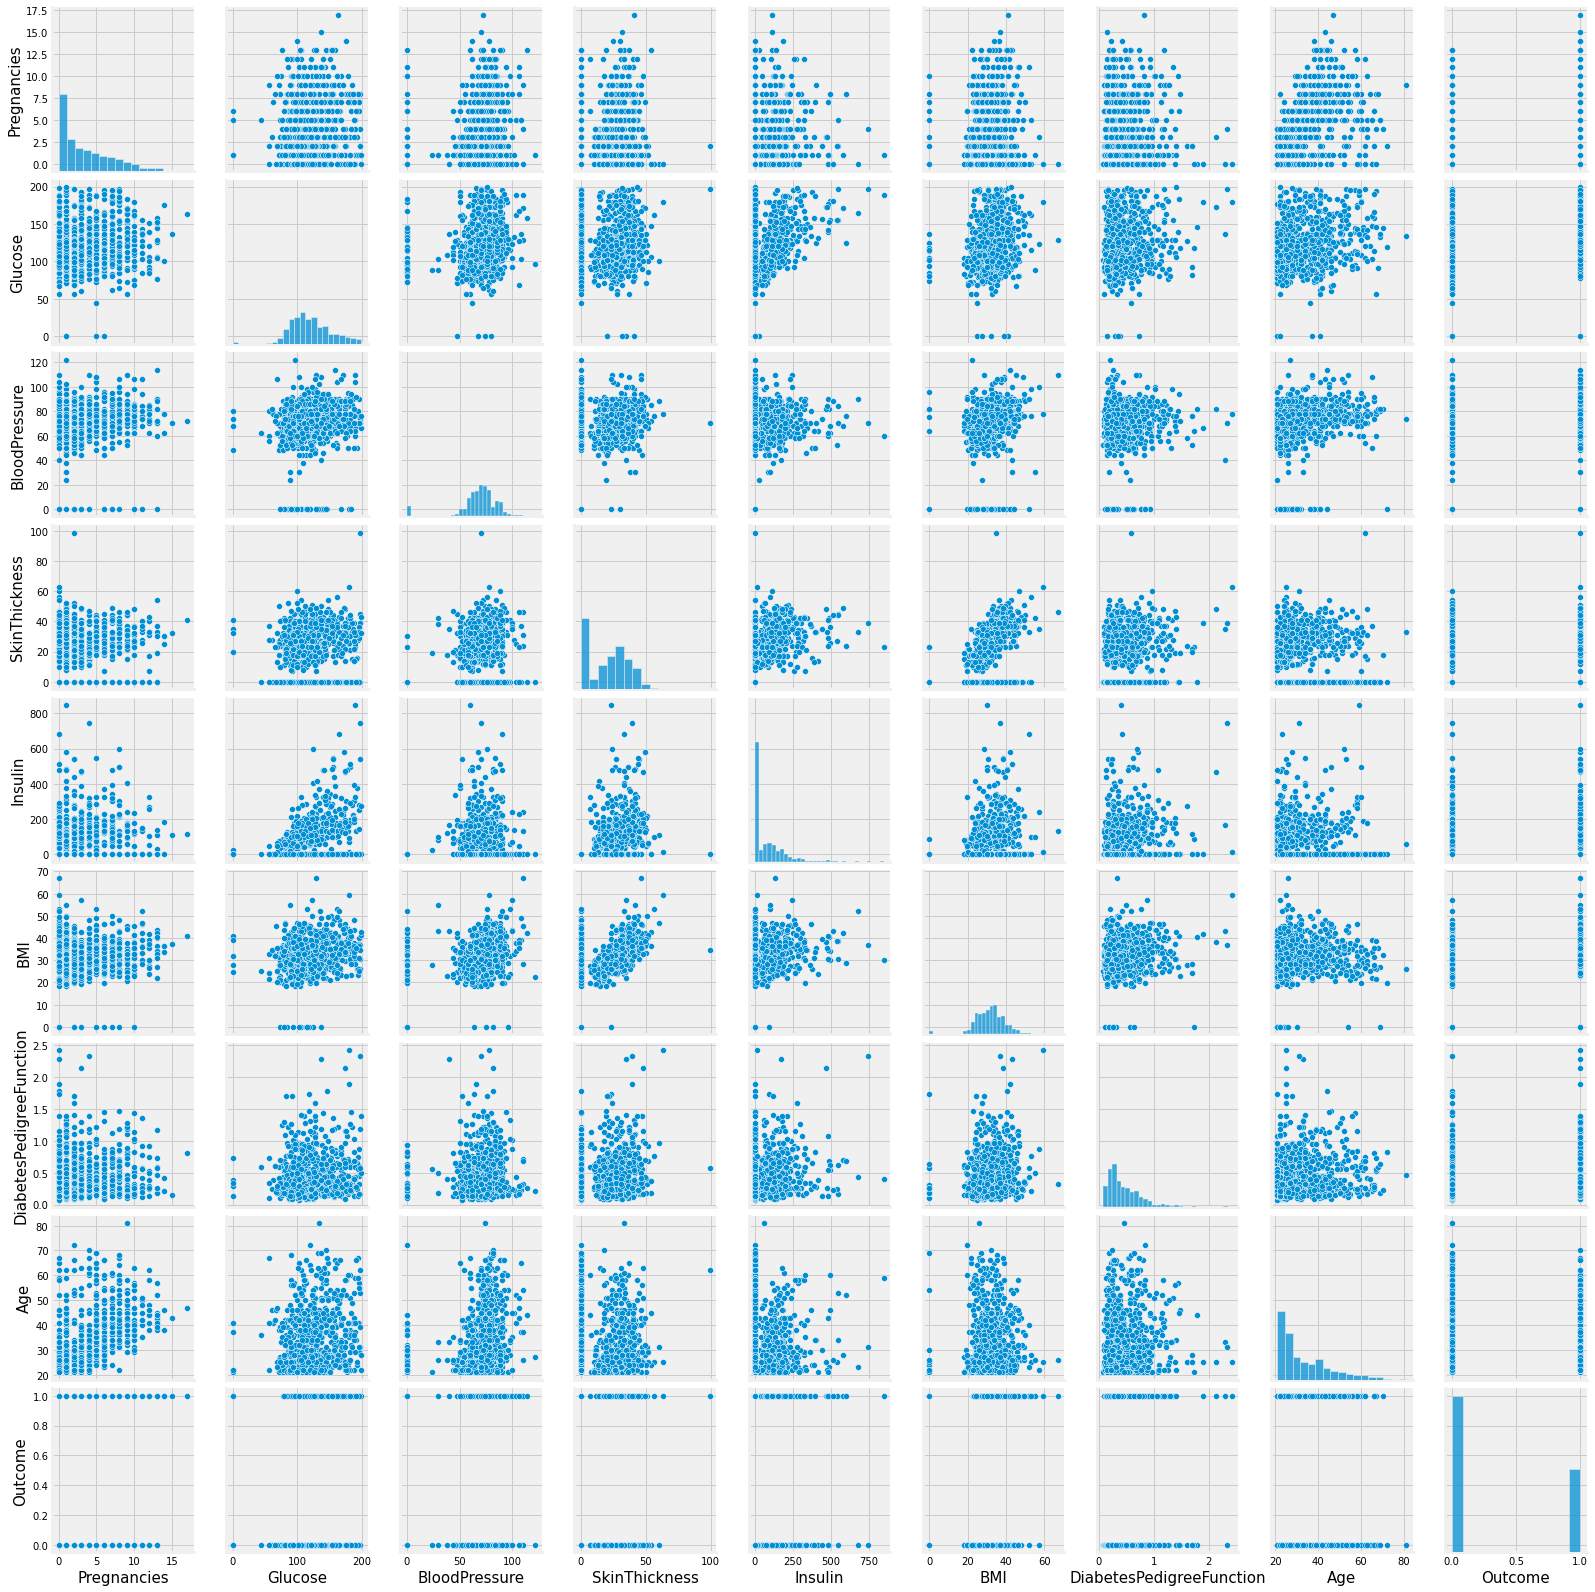

In [11]:
sns.pairplot(data=df);

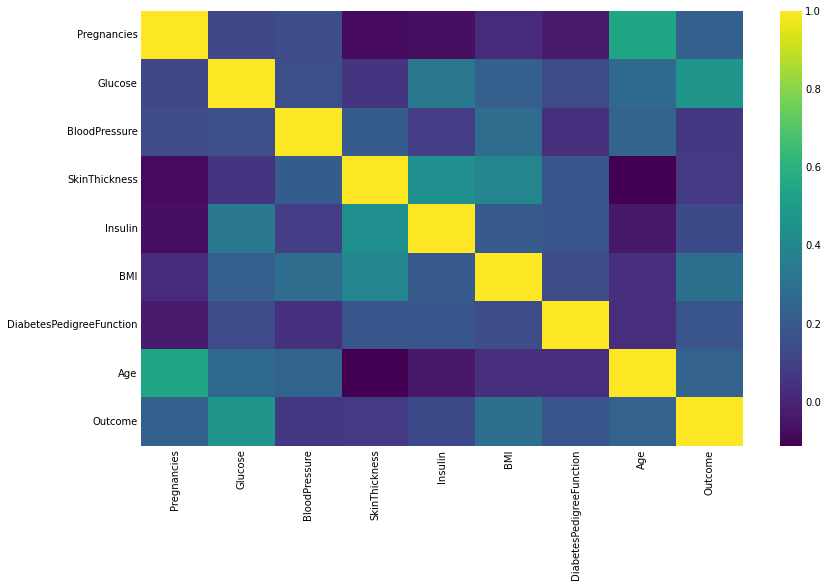

In [12]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),cmap='viridis');

In [13]:
print('Corelation between Outcome and particular column')
df.corr()['Outcome'][:-1].sort_values(ascending=False)

Corelation between Outcome and particular column


Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64

In [14]:
def plot_distribution(feature,hue):
    plt.figure(figsize=(12,8))
    sns.histplot(data=df,x=feature,kde=True,hue=hue);
    plt.rc('legend',fontsize=20)
    plt.title(f'{feature} distribution')

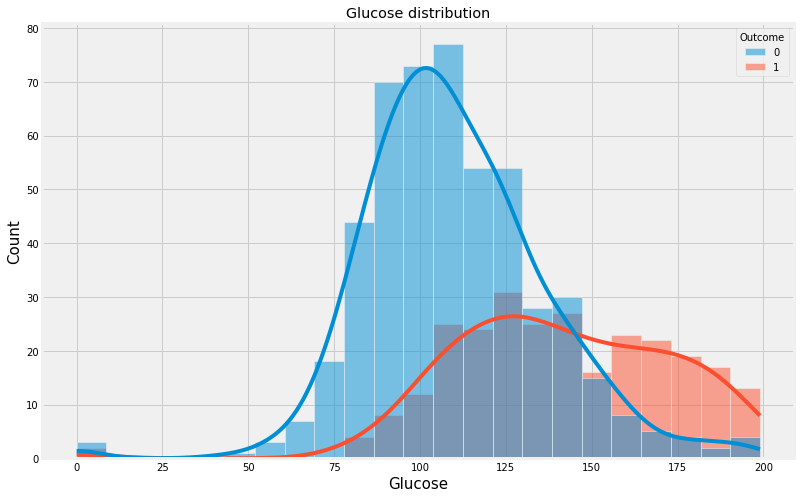

In [15]:
plot_distribution('Glucose','Outcome')

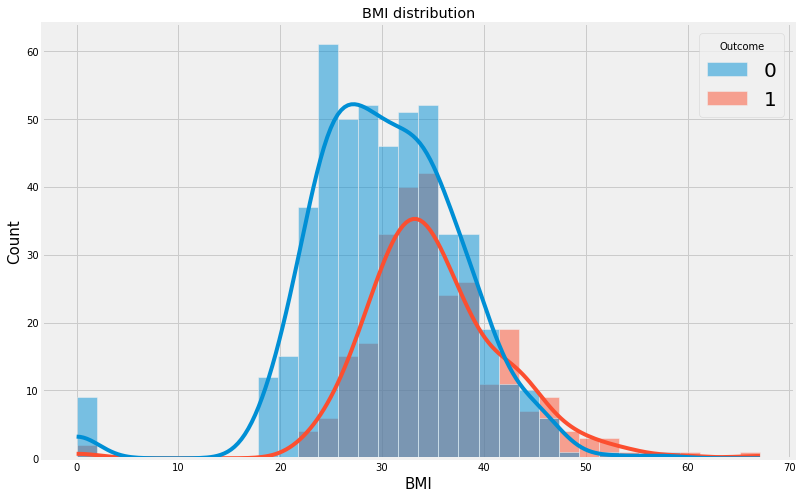

In [16]:
plot_distribution('BMI','Outcome')

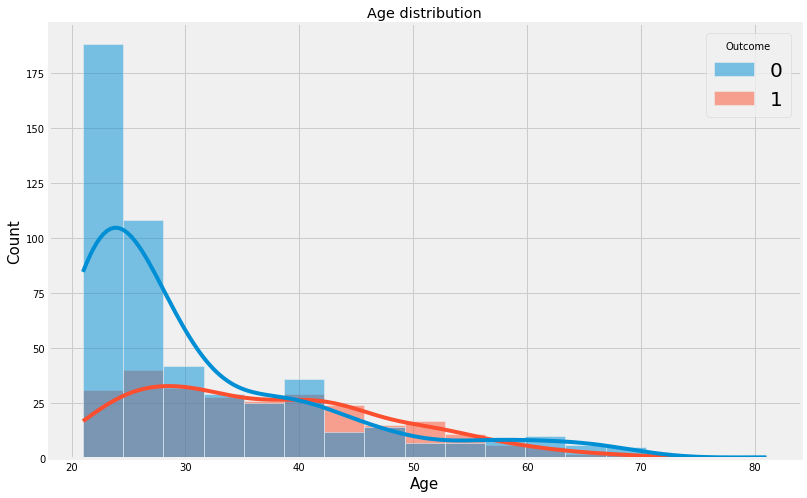

In [17]:
plot_distribution('Age','Outcome')

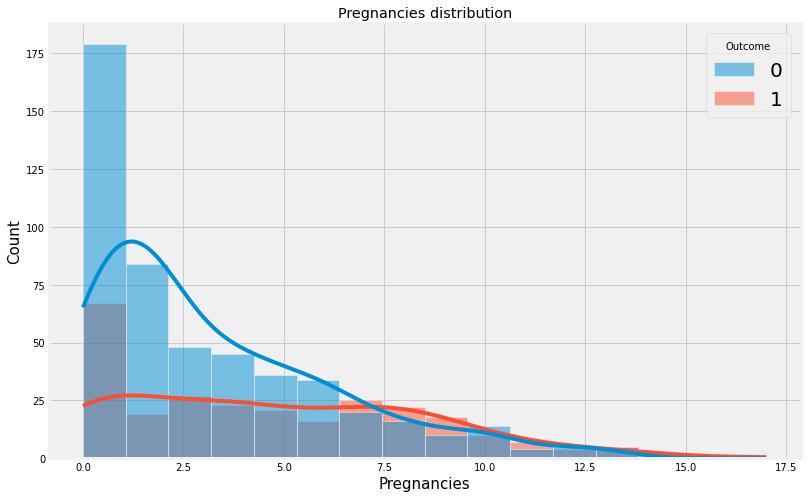

In [18]:
plot_distribution('Pregnancies','Outcome')

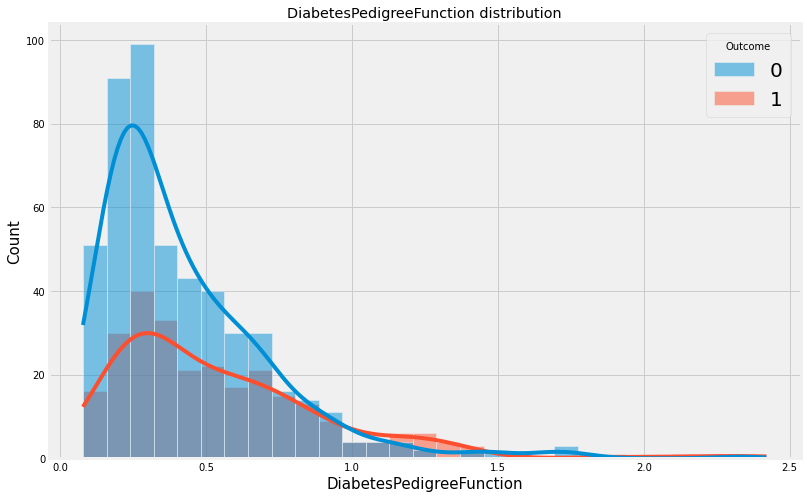

In [19]:
plot_distribution('DiabetesPedigreeFunction','Outcome')

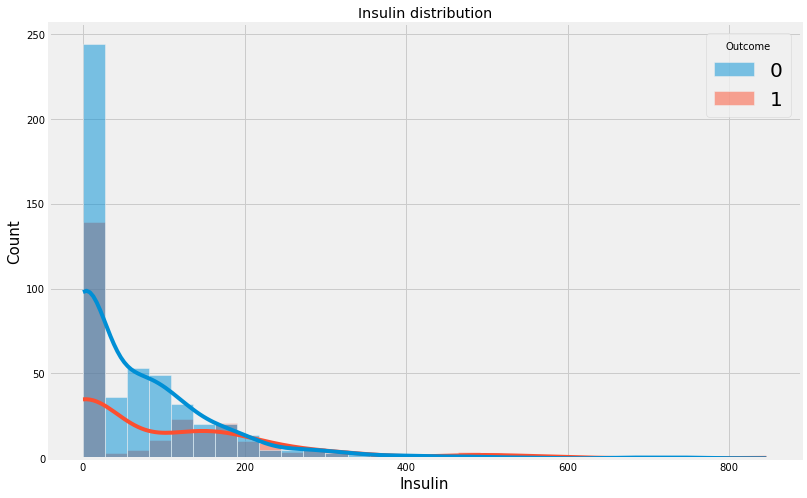

In [20]:
plot_distribution('Insulin','Outcome')

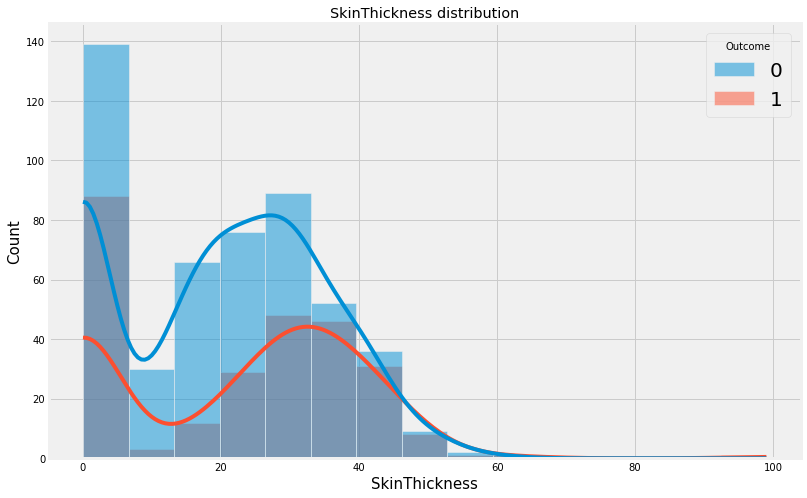

In [21]:
plot_distribution('SkinThickness','Outcome')

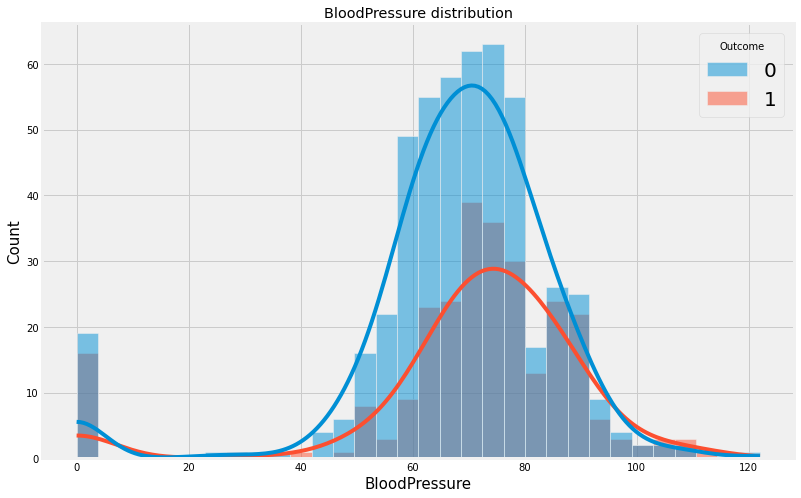

In [22]:
plot_distribution('BloodPressure','Outcome')

# Data preparation

In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [24]:
X = df.drop('Outcome',axis=1)
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

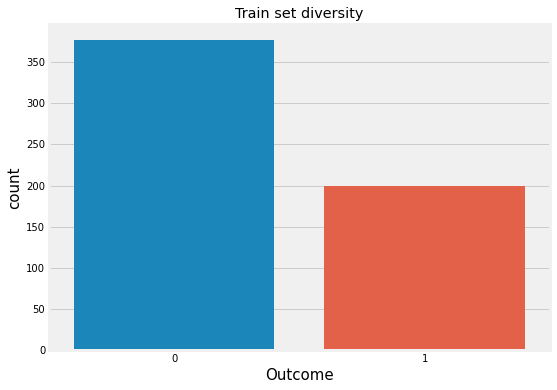

In [25]:
plt.figure(figsize=(8,6))
plt.title('Train set diversity')
sns.countplot(x = y_train);

In [26]:
percent_0 = np.where(y_train == 0)[0].shape[0] / (y_train.shape[0]) * 100
percent_1 = np.where(y_train == 1)[0].shape[0]  / (y_train.shape[0]) * 100
print(f'Percent of 0 Outcome at train Dataset: {percent_0:.3f}%\nPercent of 1 Outcome at train Dataset: {percent_1:.3f}%')

Percent of 0 Outcome at train Dataset: 65.451%
Percent of 1 Outcome at train Dataset: 34.549%


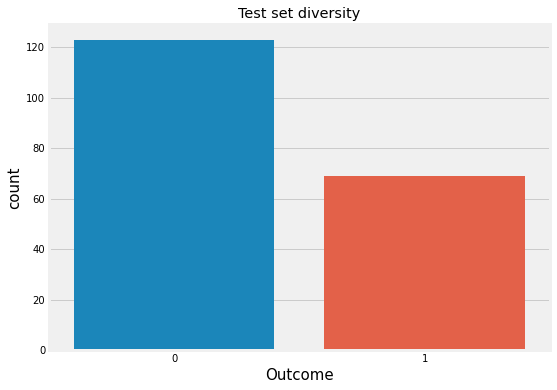

In [27]:
plt.figure(figsize=(8,6))
plt.title('Test set diversity')
sns.countplot(x = y_test);

In [28]:
percent_0 = np.where(y_test == 0)[0].shape[0] / (y_test.shape[0]) * 100
percent_1 = np.where(y_test == 1)[0].shape[0]  / (y_test.shape[0]) * 100
print(f'Percent of 0 Outcome at test Dataset: {percent_0:.3f}%\nPercent of 1 Outcome at test Dataset: {percent_1:.3f}%')

Percent of 0 Outcome at test Dataset: 64.062%
Percent of 1 Outcome at test Dataset: 35.938%


In [29]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Creating and train model

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [31]:
log_model = LogisticRegression(class_weight='balanced')
svc_model = SVC(class_weight='balanced')
rfc_model = RandomForestClassifier(class_weight='balanced')
knn_model = KNeighborsClassifier()
gbc_model = GradientBoostingClassifier()


In [32]:
log_param = {
    'C': [0.001,0.01,0.1,0.5,1],
    'penalty': ['l1','l2']
}

svc_param = {
    'kernel': ['rbf','poly','sigmoid'],
}

rfc_param = {
    'n_estimators': [64,100,128,200],
    'max_features': [2,3,4],
    'bootstrap': [True,False],
    'oob_score':  [True,False]    
}

knn_param = {
   'n_neighbors': list(range(1,31))
}

gbc_param = {
    "n_estimators":[1,5,10,20,40,100],
    'max_depth':[3,4,5,6]}



In [33]:
log_grid = GridSearchCV(log_model,param_grid=log_param,verbose=1)
svc_grid = GridSearchCV(svc_model,param_grid=svc_param,verbose=1)
rfc_grid = GridSearchCV(rfc_model,param_grid=rfc_param,verbose=1)
knn_grid = GridSearchCV(knn_model,param_grid=knn_param,verbose=1,scoring='accuracy')
gbc_grid = GridSearchCV(gbc_model,param_grid=gbc_param,verbose=1)
model_lst = [log_grid,svc_grid,rfc_grid,knn_grid,gbc_grid]

In [34]:
for elem in model_lst:
    elem.fit(X_train_scaled,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits


/home/dawid/anaconda3/envs/ml_venv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/home/dawid/anaconda3/envs/ml_venv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/dawid/anaconda3/envs/ml_venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py", line 1091, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/home/dawid/anaconda3/envs/ml_venv/lib/python3.10/site-packages/sklea

Fitting 5 folds for each of 48 candidates, totalling 240 fits


/home/dawid/anaconda3/envs/ml_venv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
60 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "/home/dawid/anaconda3/envs/ml_venv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/dawid/anaconda3/envs/ml_venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py", line 437, in fit
    raise ValueError("Out of bag estimation only available if bootstrap=True")
ValueError: Out of bag estimation only available if bootstrap=True

 

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 24 candidates, totalling 120 fits


# Model comparision

In [35]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [36]:
def create_raport(model):
    preds = model.predict(X_test_scaled)
    cm = confusion_matrix(y_test,preds)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot();
    print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.80      0.67      0.73       123
           1       0.54      0.70      0.61        69

    accuracy                           0.68       192
   macro avg       0.67      0.68      0.67       192
weighted avg       0.70      0.68      0.68       192



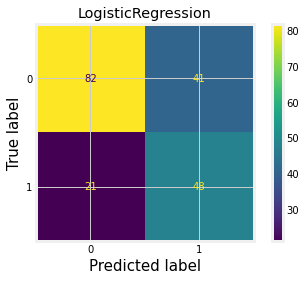

In [37]:
create_raport(log_grid)
plt.title('LogisticRegression');

              precision    recall  f1-score   support

           0       0.83      0.69      0.76       123
           1       0.58      0.75      0.65        69

    accuracy                           0.71       192
   macro avg       0.71      0.72      0.70       192
weighted avg       0.74      0.71      0.72       192



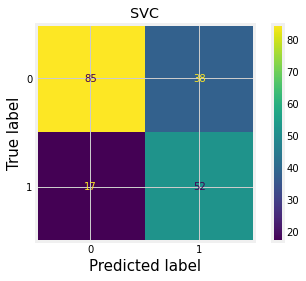

In [38]:
create_raport(svc_grid)
plt.title('SVC');

              precision    recall  f1-score   support

           0       0.79      0.80      0.79       123
           1       0.63      0.62      0.63        69

    accuracy                           0.73       192
   macro avg       0.71      0.71      0.71       192
weighted avg       0.73      0.73      0.73       192



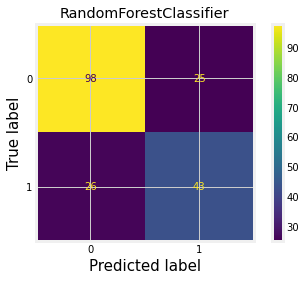

In [39]:
create_raport(rfc_grid)
plt.title('RandomForestClassifier');

              precision    recall  f1-score   support

           0       0.74      0.77      0.75       123
           1       0.56      0.51      0.53        69

    accuracy                           0.68       192
   macro avg       0.65      0.64      0.64       192
weighted avg       0.67      0.68      0.67       192



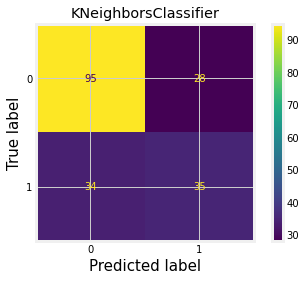

In [40]:
create_raport(knn_grid)
plt.title('KNeighborsClassifier');

              precision    recall  f1-score   support

           0       0.81      0.74      0.77       123
           1       0.59      0.68      0.64        69

    accuracy                           0.72       192
   macro avg       0.70      0.71      0.70       192
weighted avg       0.73      0.72      0.72       192



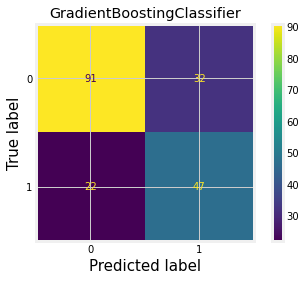

In [41]:
create_raport(gbc_grid)
plt.title('GradientBoostingClassifier');

### Now we have to consider which model match best to our task. We want to predict if patient with particular performance have diabetes or not. In my opinion, in this task the most important is to detect the most patient with diabates even if it is connected to match healthty people as sick. We always can make additional test and then match them properly, but if we miss sick people we would not be able to repair it. So best choose is Support Vector Classifier, with accuracy 71, and recall on label 1 equal to 75 ( it means that 75% of sick people would be classify as sick). That model has 58 precision on label 1 ( it means, if we predict that someone is sick there is actually 58% chance of that this person is sick at real), but as I said, for me more important is to detect as many sick person as possible. Afterall, my performance is not great, but i think with this dataset is hard to obtain someting special. Perhaps, oversampling data would be helpfull, it would reduce unbalance between 0 and 1 Outcome.

In [42]:
svc_grid.best_estimator_

SVC(class_weight='balanced')

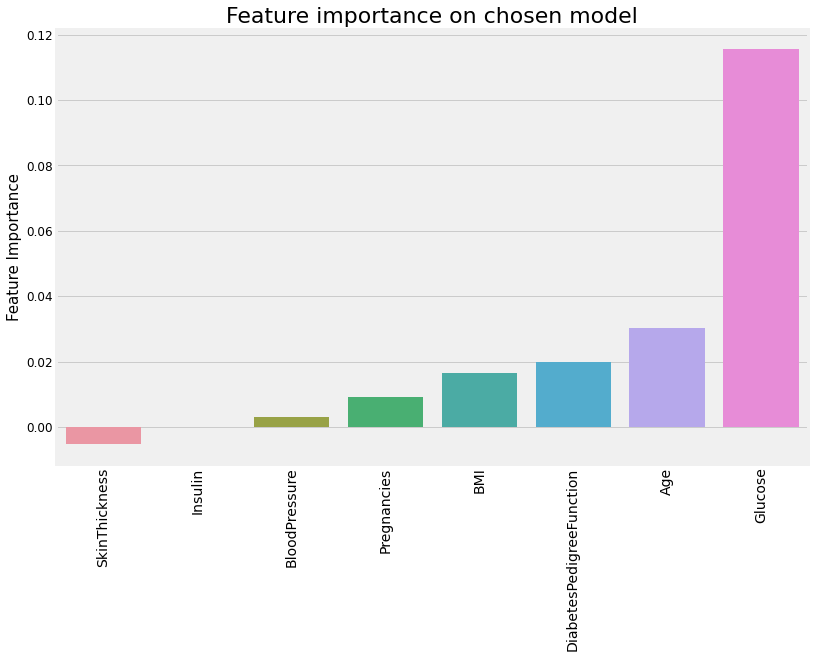

In [43]:
from sklearn.inspection import permutation_importance
perm_importance = permutation_importance(svc_grid, X_test_scaled, y_test)

feat_imp = pd.DataFrame(index = X.columns,
                        data={
    'Feature Importance': perm_importance['importances_mean']
})


plt.figure(figsize=(12,8))
plt.xticks(rotation=90,fontsize=14)
plt.yticks(fontsize=12)
plt.title('Feature importance on chosen model',fontsize=22)
feat_imp = feat_imp.sort_values('Feature Importance')
sns.barplot(x = feat_imp.index, y = 'Feature Importance', data = feat_imp);


# Creating pipeline, and training final model at all data.

In [44]:
from sklearn.pipeline import Pipeline

In [45]:
pipe = Pipeline([('scaler', StandardScaler()),('svc', SVC(kernel='rbf', class_weight='balanced'))])

In [46]:
pipe.fit(X.values,y.values)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svc', SVC(class_weight='balanced'))])

# Saving model

In [47]:
from joblib import dump,load

In [48]:
dump(pipe,'diabetes_model.joblib')

['diabetes_model.joblib']

In [49]:
model = load('diabetes_model.joblib')

In [50]:
data = [3,150,36,42,130,50,2.288,50]

In [51]:
model.predict([data])

array([1])

# Now model is easily to load, and we can input data and check what model predict.